# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

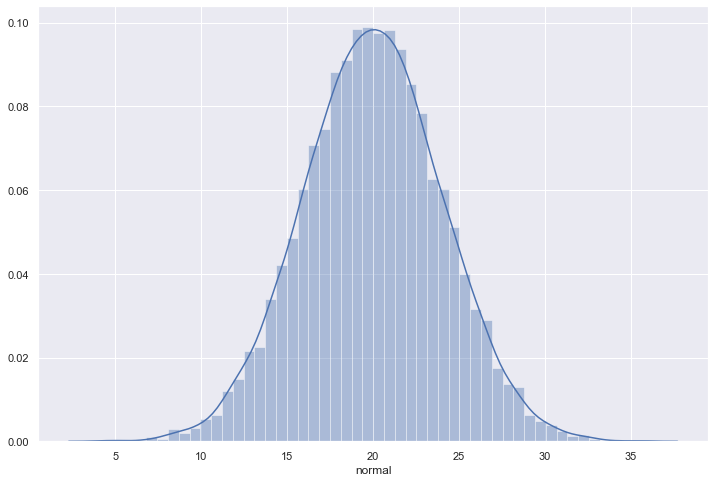

In [4]:
# Sua análise da parte 1 começa aqui.
sns.distplot(dataframe.normal)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [6]:
def q1():
    quantis = dataframe.describe().iloc[4:7]
    norm = quantis['normal']
    binom = quantis['binomial']
    return tuple(np.round((norm - binom).values, 3))

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [7]:
def q2():
    # Mean
    mean = dataframe.normal.mean()
    # Standard Deviation
    std = dataframe.normal.std()
    #  Empirical CDF
    ecdf = ECDF(dataframe.normal)
    
    return float(round(ecdf(mean + std) - ecdf(mean - std), 3))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [8]:
def q3():
    bin_mean = dataframe.binomial.mean()
    bin_var = dataframe.binomial.var()

    norm_mean = dataframe.normal.mean()
    norm_var = dataframe.normal.var()

    rounded_mean_diff = round(bin_mean - norm_mean, 3)
    rounded_var_diff = round(bin_var - norm_var, 3)
    
    return (rounded_mean_diff, rounded_var_diff)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [9]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [10]:
def standardize(series):
    return (series-series.mean()) / series.std()

In [11]:
# Getting the mean_profile variable for the no pulsar stars only
mean_profile_no_pulsar = stars[stars.target == 0].mean_profile

# Standardizing
mean_profile_no_pulsar_std = standardize(mean_profile_no_pulsar)

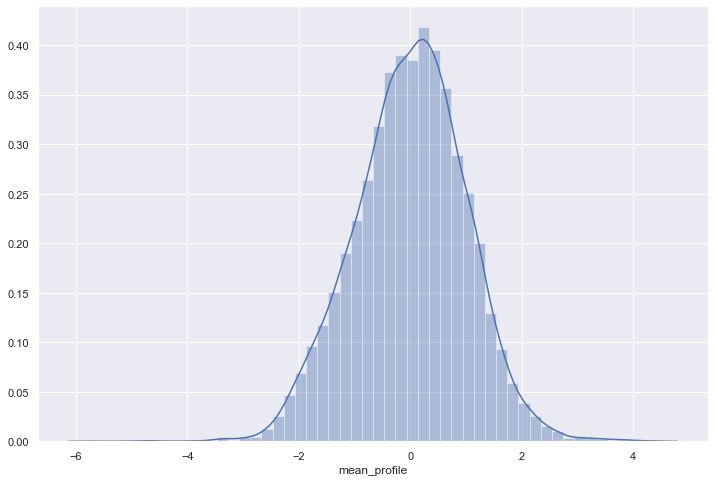

In [12]:
sns.distplot(mean_profile_no_pulsar_std)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [13]:
def q4():
    # Values for 80%, 90% e 95% logical quantis
    q80 = sct.norm.ppf(0.80)
    q90 = sct.norm.ppf(0.90)
    q95 = sct.norm.ppf(0.95)

    # Fitting ECDF
    ecdf = ECDF(mean_profile_no_pulsar_std)

    # Returning the probability for the given quantis
    return (round(ecdf(q80), 3), round(ecdf(q90), 3), round(ecdf(q95), 3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [14]:
def get_Nth_value_from_series(values, n):
    count = len(values)
    sorted_values = sorted(values)
    return sorted_values[int(count * n)]

In [15]:
def q5():
    # Teorical quantis values
    q1_teoric = sct.norm.ppf(0.25, loc=0, scale=1)
    q2_teoric = sct.norm.ppf(0.50, loc=0, scale=1)
    q3_teoric = sct.norm.ppf(0.75, loc=0, scale=1)
    
    # Difference between quantis and the logical quantis
    diff25 = get_Nth_value_from_series(mean_profile_no_pulsar_std, 0.25) - q1_teoric
    diff50 = get_Nth_value_from_series(mean_profile_no_pulsar_std, 0.50) - q2_teoric
    diff75 = get_Nth_value_from_series(mean_profile_no_pulsar_std, 0.75) - q3_teoric
    
    return (round(diff25, 3), round(diff50, 3), round(diff75, 3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.